OUTLIER TREATMENT 
1. DROPPING THE OUTLIER
2. REPLACE WITH MEAN/ MEDIAN
3. CAPPING THE OUTLIER

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
salary = [11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,140]

In [7]:
np.quantile(salary, [0,0.25, 0.5, 0.75, 1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [9]:
df = pd.DataFrame(salary, columns=['salary'])

In [10]:
df

,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [12]:
df.describe()

,salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


In [13]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Dell\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

# 1. DROP THE OUTLIERS

Text(0.5, 1.0, 'box plot')

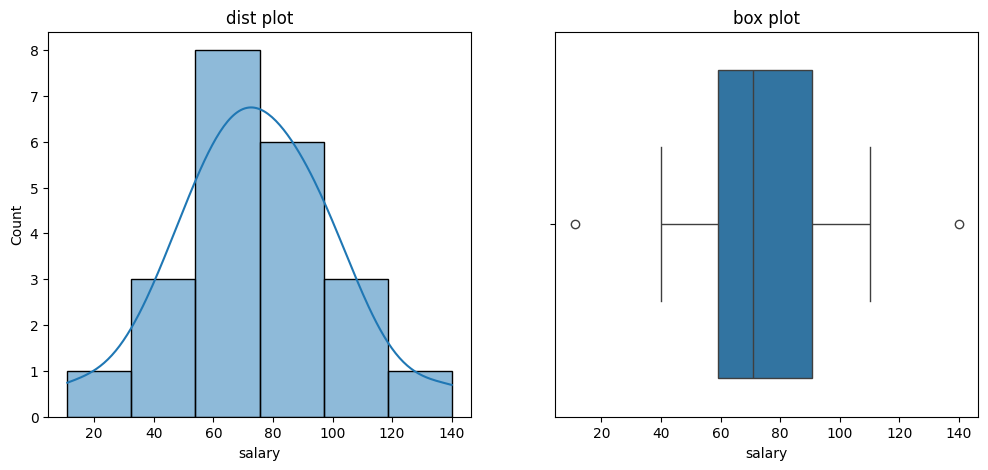

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['salary'], kde=True)
plt.title('dist plot')
plt.subplot(1,2,2)
sns.boxplot(data = df, x='salary')
plt.title('box plot')

In [23]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)


In [24]:
Q1

59.0

In [26]:
Q3

90.75

In [27]:
IQR = Q3-Q1

In [28]:
IQR

31.75

In [29]:
lower_fence = Q1 - 1.5*IQR

In [30]:
lower_fence


11.375

In [31]:
upper_fence = Q3 + 1.5*IQR

In [32]:
upper_fence

138.375

In [38]:
df_filtered = df[(df['salary']>=lower_fence) & (df['salary']<=upper_fence)]

In [39]:
df_filtered

,salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [40]:
df.shape

(22, 1)

In [41]:
df_filtered.shape

(20, 1)

<Axes: xlabel='salary'>

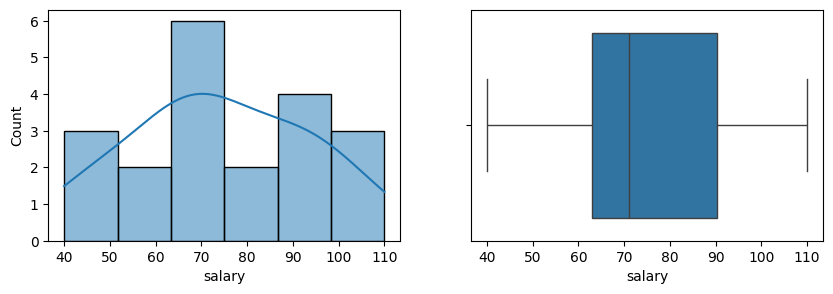

In [49]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(df_filtered['salary'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x='salary')

In [51]:
summary = df_filtered.describe()

In [52]:
summary

,salary
count,20.000000
mean,74.200000
std,19.487108
min,40.000000
25%,63.000000
50%,71.000000
75%,90.250000
max,110.000000


In [53]:
q1 = 40
q3 = 90.25

In [54]:
iqr = q3-q1

In [55]:
iqr

50.25

In [56]:
lowerf = q1 - 1.5*iqr
upperf = q3 + 1.5*iqr

In [57]:
lowerf

-35.375

In [58]:
upper_fence

138.375

# 2. REPLACE WITH MEAN/MEDIAN

In [61]:
array_mean_imputed = np.where((df['salary']>upper_fence) | (df['salary']<lower_fence), df['salary'].mean(), df['salary'] )

In [62]:
array_mean_imputed

array([ 74.31818182,  40.        ,  45.        ,  68.        ,
        65.        ,  68.        ,  78.        ,  90.        ,
        57.        ,  74.        ,  91.        ,  92.        ,
        88.        ,  68.        ,  57.        ,  48.        ,
        99.        , 101.        ,  68.        ,  77.        ,
       110.        ,  74.31818182])

In [63]:
df['salary_mean_imputation'] = array_mean_imputed

In [64]:
df

,salary,salary_mean_imputation
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


<Axes: xlabel='salary_mean_imputation'>

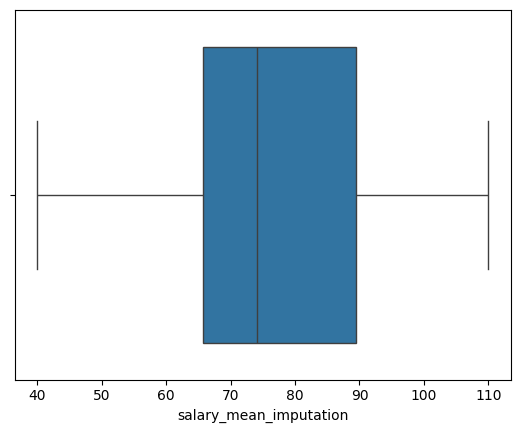

In [68]:
sns.boxplot(data=df, x='salary_mean_imputation')

In [72]:
array_median = np.where((df['salary']>upper_fence) | (df['salary']<lower_fence), df['salary'].median(), df['salary'])

In [73]:
array_median

array([ 71.,  40.,  45.,  68.,  65.,  68.,  78.,  90.,  57.,  74.,  91.,
        92.,  88.,  68.,  57.,  48.,  99., 101.,  68.,  77., 110.,  71.])

In [74]:
df['salary_median_imputation'] = array_median

In [75]:
df

,salary,salary_mean_imputation,salary_median_imputation
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


<Axes: xlabel='salary_median_imputation'>

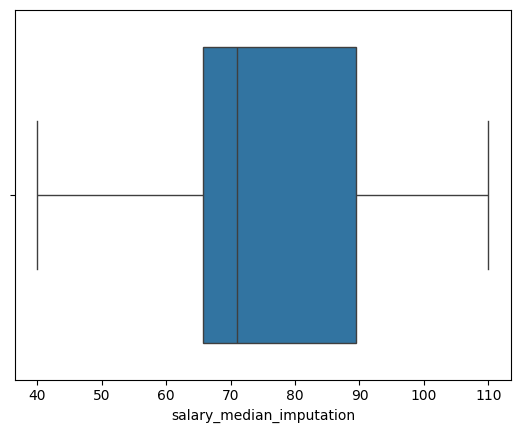

In [76]:
sns.boxplot(data=df, x='salary_median_imputation')

# 3. CAPPING THE OUTLIER

capping means replace the outlier with the nearest value that is not a outlier or you can replace with the lower fence anf upper fence

In [77]:
lower_cap = df['salary'].quantile(0.05)

In [78]:
upper_cap = df['salary'].quantile(0.95)

In [79]:
lower_cap

40.25

In [80]:
upper_cap

109.55

In [85]:
array_cap = np.where(df['salary']<lower_cap,lower_cap, np.where(df['salary']>upper_cap,upper_cap,df['salary']))

In [86]:
array_cap

array([ 40.25,  40.25,  45.  ,  68.  ,  65.  ,  68.  ,  78.  ,  90.  ,
        57.  ,  74.  ,  91.  ,  92.  ,  88.  ,  68.  ,  57.  ,  48.  ,
        99.  , 101.  ,  68.  ,  77.  , 109.55, 109.55])

In [88]:
df['salary_capped'] = array_cap

In [89]:
df

,salary,salary_mean_imputation,salary_median_imputation,salary_capped
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00


<Axes: xlabel='salary_capped'>

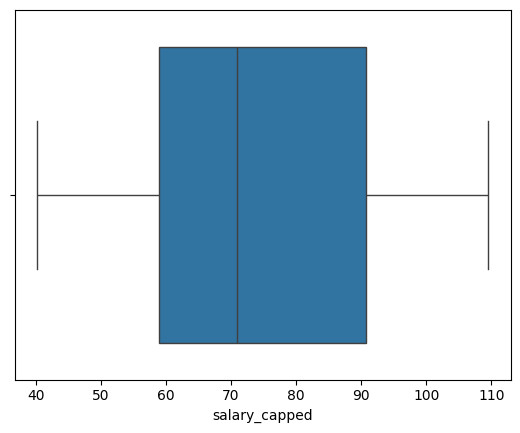

In [90]:
sns.boxplot(data=df, x='salary_capped')